# **Árvore de Decisão - Machine Learning 17**

### Bibliotecas

In [1]:
# Libs
import numpy as np
import pandas as pd

### Base de Dados

In [2]:
# Função de carregamento de dados
def carregarDados(arquivo, deli):
    ds = pd.read_csv(arquivo, sep=deli)
    # Amostra
    X = ds.iloc[:,:-1].values
    # Variável independente 
    y = ds.iloc[:,-1].values
    return X, y, ds

### Substituído Valores Faltante

In [3]:
# Função de Substituição dos valores
def valorFaltante(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

### Transformando os valores

In [4]:
# Função de Transformação dos Valores
def transform(X):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    #one hot encoding
    D = pd.get_dummies(X[:,0]).values
    
    X = X[:,1:]
    for ii in range(0, D.shape[1]):
        X = np.insert(X, X.shape[1], D[:,ii], axis=1)
    X = X[:,:X.shape[1] - 1]

    return X

### Dividindo a base de Treino e Teste

In [5]:
# Função de Treino e Teste
def treinoTeste(X, y, testSize, rs):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=testSize, random_state=rs)
    return XTrain, XTest, yTrain, yTest

### Classe de Classificação do Modelo

In [6]:
# Função de previsão
def previsaoModelo(regressor , X_test, ad):
    if ad == False:
        X_test = X_test[0]
    return regressor.predict(X_test)

# Função de matriz de confusão 
def matrizConfusao(regressor, y_Test, y_Pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_Test, y_Pred)

    return cm

### Modelo de Árvore de Decisão

In [7]:
# Classe do Modelo SVM
def computarModelo(X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train, y_train)

    return classifier        

### Valor da Accuracy

In [8]:
# Função para calcular o valor de Accuracy
def valorAccuracy(matrizConfusao):
    valor_accuracy = (matrizConfusao[0][0] + matrizConfusao[1][1]) / (matrizConfusao[0][0] + matrizConfusao[1][0] + matrizConfusao[0][1] + matrizConfusao[1][1])
    return valor_accuracy * 100

### Rodando Todas as Funções

In [9]:
# Função que roda todas as funções nos dados do titanic
def rodarModeloTitan(dados, rs):
    X, y, csv = carregarDados(dados, ',')
    X = valorFaltante(X, 2, 3)

    X = transform(X)
    X = transform(X)

    XTrain, XTest, yTrain, yTest = treinoTeste(X, y, 0.15, rs)

    classifier = computarModelo(XTrain, yTrain)
    y_pred = previsaoModelo(classifier, XTest, True)
    return matrizConfusao(classifier, y_pred, yTest)

### Resultado Final

Média do Árvore de Decisão: 77.5597014925373
Desvio padrão do Árvore de Decisão: 3.0537893372179483
Valor máximo da Acurácia do Titanic: 84.32835820895522
Valor mínimo da Acurácia do Titanic: 68.65671641791045


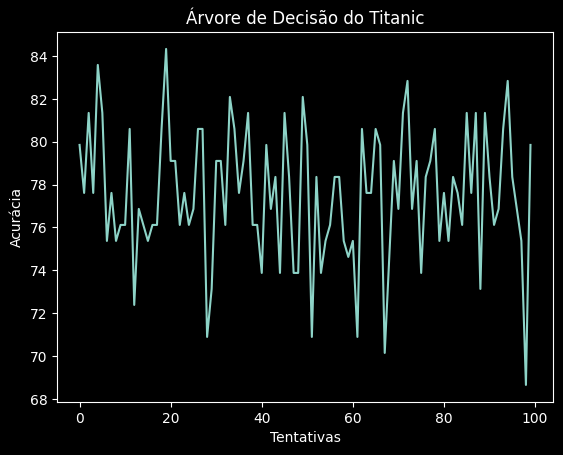

In [10]:
# Rodando a função no dados de titanic
import numpy as np
dtArray = []
for i in range(0, 100):
    cmDL = rodarModeloTitan('../data/titanic.csv', i)
    dtArray.append(valorAccuracy(cmDL))

print(f'Média do Árvore de Decisão: {np.mean(dtArray)}')
print(f'Desvio padrão do Árvore de Decisão: {np.std(dtArray)}')
# Valor máximo da Acurácia dos modelo de Naive Bayes
print(f'Valor máximo da Acurácia do Titanic: {max(dtArray)}')
# Valor mínimo da Acurácia dos modelo de Naive Bayes
print(f'Valor mínimo da Acurácia do Titanic: {min(dtArray)}')

# Visualizando os resultados no gráfico
import matplotlib.pyplot as plt
plt.plot(dtArray)
plt.title('Árvore de Decisão do Titanic')
plt.ylabel("Acurácia")
plt.xlabel("Tentativas")
plt.show()